<a href="https://colab.research.google.com/github/KanthaAnanya/OIBSIP_task4/blob/main/EmailSpamDetection_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm


In [ ]:
#read the dataset
df=pd.read_csv('/content/spam.csv',encoding="'ISO-8859-1")
print('the snapshot of the dataset using df.head() method is :')
print(df.head())  # returns first 5 rows of the dataset

the snapshot of the dataset using df.head() method is :
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
df.tail() #returns last five rows of the dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
# returns description of the data in the dataset
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# to display information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#returns a tuple representing the dimensionality of the dataset
df.shape

(5572, 5)

In [ ]:
#return true or false if any null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
columns=['v1','v2','Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4']
df=df.drop(columns=['Unnamed: 2'	,'Unnamed: 3',	'Unnamed: 4'],axis=1)  # removing the columns which are not neccesary
df=df.rename(columns={'v1':'label','v2':'emailtext'}) # renaming the columns

In [ ]:
df.head()

,label,emailtext
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

label        0
emailtext    0
dtype: int64

In [ ]:
#downloading the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['length']=df['emailtext'].apply(len)
df.head()

,label,emailtext,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
def process(emailtext):
  nopunctuation=[char for char in emailtext if char not in string.punctuation]
  nopunctuation=''.join(nopunctuation)
  clean=[word for word in nopunctuation.split() if word.lower() not in stopwords.words('english')]
  return clean
# to show the tokenization
df['emailtext'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: emailtext, dtype: object

<Axes: >

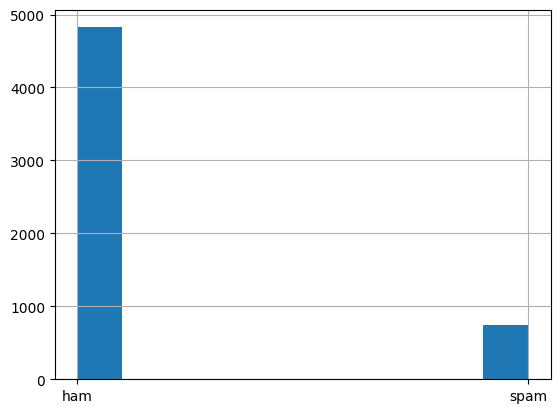

In [ ]:

df['label'].hist()

<Axes: >

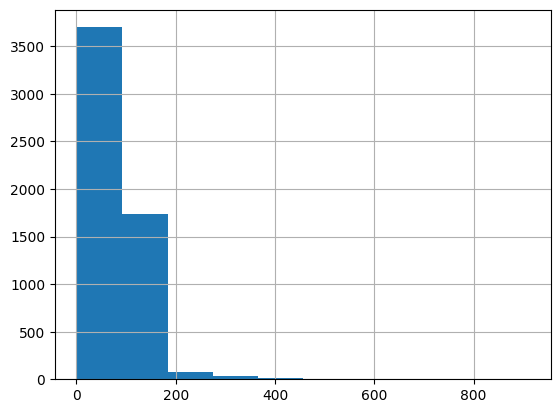

In [ ]:
df['length'].hist()

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

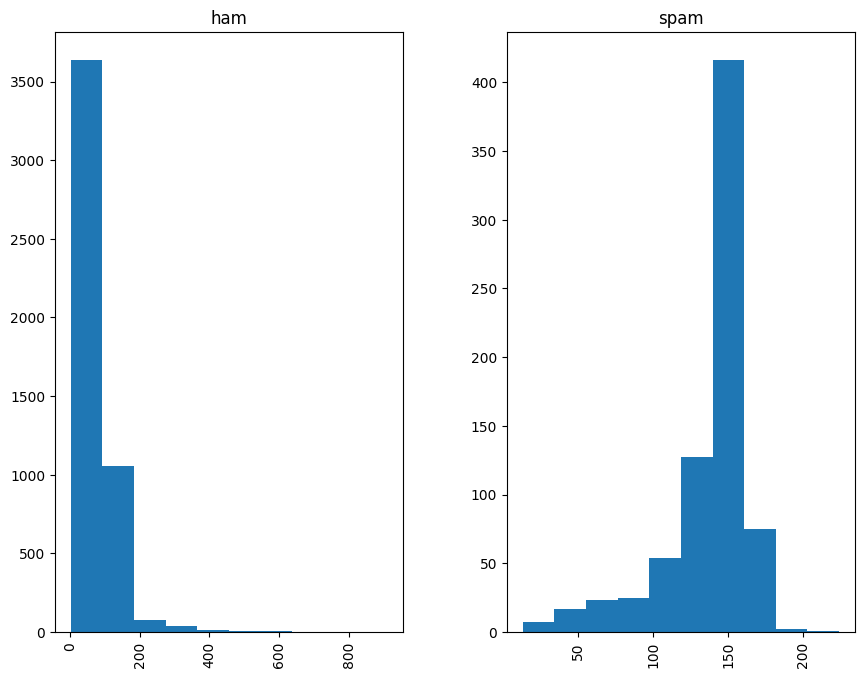

In [ ]:
df.hist(column='length',by='label',figsize=(10,8))

In [ ]:
df1=df.replace(to_replace=['ham','spam'],value=[0,1])
df
df1.head(10)


,label,emailtext,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
msg=CountVectorizer(analyzer=process).fit_transform(df['emailtext'])

In [ ]:
# split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(msg,df['label'],test_size=0.20,random_state=0)
print(msg.shape) #prints shape of the data

(5572, 11304)


In [ ]:
#create and train Support Vector Machine classifier
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
#Evaluating the model on the training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf.predict(X_train)
print(classification_report(y_train,y_pred))
print('\n')
print("confusion Matrix: \n",confusion_matrix(y_train,y_pred))
print("Accuracy:\n",accuracy_score(y_train,y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3876
        spam       1.00      0.96      0.98       581

    accuracy                           1.00      4457
   macro avg       1.00      0.98      0.99      4457
weighted avg       1.00      1.00      1.00      4457



confusion Matrix: 
 [[3876    0]
 [  21  560]]
Accuracy:
 0.9952883105227731


In [ ]:
print(clf.predict(X_train))
print(y_train.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [ ]:
#evaluating the model on testing dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
print('\n')
print("confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       949
        spam       1.00      0.78      0.87       166

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



confusion Matrix: 
 [[949   0]
 [ 37 129]]
Accuracy:
 0.9668161434977578


In [ ]:
print(clf.predict(X_test))
print(y_test.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
